In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
train_df = pd.read_csv("E:\\brijesh\\Projects\\house_price\\train.csv")
test_df = pd.read_csv("E:\\brijesh\\Projects\\house_price\\test.csv")
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
train_df.shape

(29451, 12)

In [4]:
##Removing extra columns
train_df=train_df.drop(['LONGITUDE','LATITUDE'],axis='columns')
test_df=test_df.drop(['LONGITUDE','LATITUDE'],axis='columns')
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",60.5


In [5]:
#Checking null values
train_df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
train_df['BHK_NO.'].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11],
      dtype=int64)

In [7]:
train_df['SQUARE_FT'].describe()

count    2.945100e+04
mean     1.980217e+04
std      1.901335e+06
min      3.000000e+00
25%      9.000211e+02
50%      1.175057e+03
75%      1.550688e+03
max      2.545455e+08
Name: SQUARE_FT, dtype: float64

C:\Users\jagvir sinhj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK_NO.', ylabel='SQUARE_FT'>

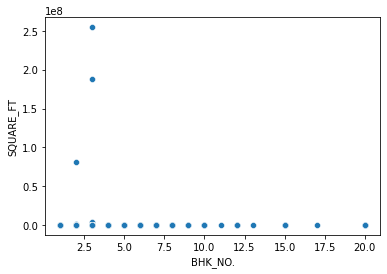

In [8]:
sns.scatterplot(train_df['BHK_NO.'],train_df['SQUARE_FT'])

In [9]:
train_df['PRICE_PER_SQR_FT']=(train_df['TARGET(PRICE_IN_LACS)']*100000)/train_df['SQUARE_FT']
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),PRICE_PER_SQR_FT
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0,4229.999999
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",51.0,4000.000000
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",43.0,4608.000000
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",62.5,6721.000000
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",60.5,6056.000000


In [10]:
train_df['PRICE_PER_SQR_FT'].describe()

count     29451.000000
mean       7503.938338
std       10847.976910
min           1.000000
25%        3551.500001
50%        5095.000000
75%        8055.000000
max      900000.000000
Name: PRICE_PER_SQR_FT, dtype: float64

## Removing outliers using mean and standard deviation

In [11]:
def remove_area_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('ADDRESS'):
        m = np.mean(subdf.PRICE_PER_SQR_FT)
        sd = np.std(subdf.PRICE_PER_SQR_FT)
        reduced_df = subdf[(subdf.PRICE_PER_SQR_FT > (m-sd)) & (subdf.PRICE_PER_SQR_FT < (m+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [12]:
train_df1 = remove_area_outliers(train_df)
train_df1.shape

(16549, 11)

In [13]:
train_df1['PRICE_PER_SQR_FT'].describe()

count     16549.000000
mean       7225.587709
std        6359.513904
min         232.000000
25%        3651.999999
50%        5238.000001
75%        7964.000002
max      109757.000004
Name: PRICE_PER_SQR_FT, dtype: float64

C:\Users\jagvir sinhj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK_NO.', ylabel='PRICE_PER_SQR_FT'>

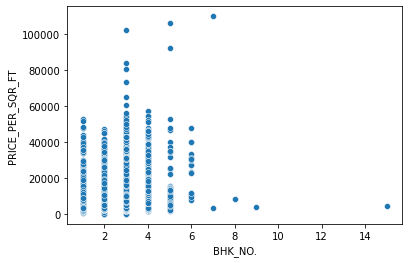

In [14]:
sns.scatterplot(train_df1['BHK_NO.'],train_df1['PRICE_PER_SQR_FT'])

(array([1.407e+04, 1.951e+03, 3.510e+02, 1.150e+02, 5.100e+01, 4.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([   232.00000001,  11184.50000046,  22137.0000009 ,  33089.50000134,
         44042.00000179,  54994.50000223,  65947.00000267,  76899.50000312,
         87852.00000356,  98804.500004  , 109757.00000445]),
 <BarContainer object of 10 artists>)

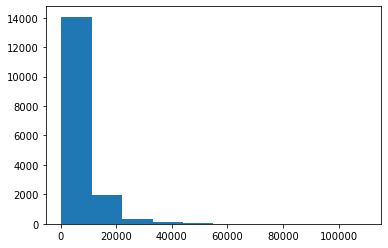

In [15]:
plt.hist(train_df1['PRICE_PER_SQR_FT'])

In [16]:
house_type = train_df1.groupby('BHK_OR_RK')['BHK_OR_RK'].agg('count')
house_type

BHK_OR_RK
BHK    16540
RK         9
Name: BHK_OR_RK, dtype: int64

C:\Users\jagvir sinhj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK_OR_RK', ylabel='PRICE_PER_SQR_FT'>

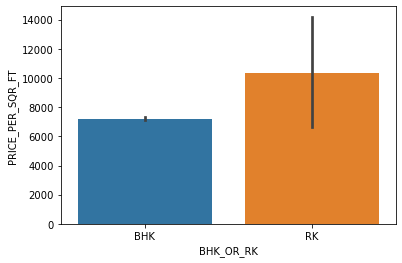

In [17]:
sns.barplot(train_df1.BHK_OR_RK,train_df1.PRICE_PER_SQR_FT)

In [18]:
train_df1.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),PRICE_PER_SQR_FT
0,Dealer,1,0,3,BHK,2600.104004,0,1,"1st Block Jayanagar,Bangalore",450.0,17307.000001
1,Owner,0,1,3,BHK,2470.588235,1,1,"1st Block Jayanagar,Bangalore",420.0,17000.000002


In [19]:
different_loc = train_df1.groupby('ADDRESS')['ADDRESS'].agg('count').sort_values(ascending=False)
different_loc

ADDRESS
Zirakpur,Chandigarh              341
Raj Nagar Extension,Ghaziabad    165
Whitefield,Bangalore             144
New Town,Kolkata                 109
Sector-137 Noida,Noida            98
                                ... 
Dairy Circle,Bangalore             1
Dahisar,Lalitpur                   1
Sector-22 Gurgaon,Gurgaon          1
Madhavpura,Vadodara                1
Rambaug Colony,Pune                1
Name: ADDRESS, Length: 2373, dtype: int64

In [20]:
## Creating new column "CITY" using split function on ADDRESS
train_df1['CITY'] = train_df1['ADDRESS'].apply(lambda x: str(x.split(",")[-1]))
test_df['CITY'] = test_df['ADDRESS'].apply(lambda x: str(x.split(",")[-1]))

In [21]:
train_df1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),PRICE_PER_SQR_FT,CITY
0,Dealer,1,0,3,BHK,2600.104004,0,1,"1st Block Jayanagar,Bangalore",450.0,17307.000001,Bangalore
1,Owner,0,1,3,BHK,2470.588235,1,1,"1st Block Jayanagar,Bangalore",420.0,17000.000002,Bangalore
2,Dealer,0,0,2,BHK,1149.095088,1,1,"1st Block Jayanagar,Bangalore",120.0,10442.999997,Bangalore
3,Dealer,1,0,3,BHK,3200.000000,0,1,"1st Block Jayanagar,Bangalore",460.0,14375.000000,Bangalore
4,Dealer,0,1,3,BHK,2569.435948,1,1,"1st Block Jayanagar,Bangalore",420.0,16345.999998,Bangalore


In [22]:
# Checking Unique values of cities
train_df1.CITY.unique()

array(['Bangalore', 'Mysore', 'Lalitpur', 'Maharashtra', 'Mumbai',
       'Indore', 'Rewari', 'Ghaziabad', 'Valsad', 'Kolkata', 'Surat',
       'Chennai', 'Jabalpur', 'Jaipur', 'Jamshedpur', 'Mohali',
       'Vadodara', 'Tirupati', 'Pune', 'Raigad', 'Lucknow', 'Puri',
       'Ernakulam', 'Kochi', 'Secunderabad', 'Bhiwadi', 'Thrissur',
       'Dehradun', 'Udupi', 'Raipur', 'Visakhapatnam', 'Kota',
       'Allahabad', 'Patna', 'Bharuch', 'Alwar', 'Goa', 'Margao',
       'Bhopal', 'Ranchi', 'Noida', 'Kanpur', 'Vijayawada', 'Mangalore',
       'Coimbatore', 'Solan', 'Haridwar', 'Durgapur', 'Udaipur',
       'Aurangabad', 'Guwahati', 'Nagpur', 'Palghar', 'Rajkot', 'Shimla',
       'Nainital', 'Raigarh', 'Durg', 'Asansol', 'Amravati', 'Panaji',
       'Vapi', 'Siliguri', 'Palakkad', 'Jammu', 'Faridabad', 'Tenali',
       'Kanchipuram', 'Ratnagiri', 'Bokaro', 'Jodhpur', 'Gwalior',
       'Chandrapur', 'Gurgaon', 'Agra', 'Chandigarh', 'Hubli', 'Karjat',
       'Meerut', 'Bhubaneswar', 'Ajmer',

In [23]:
# Counting different values of cities
diff_city=train_df1.groupby('CITY')['CITY'].agg('count').sort_values(ascending=False)
diff_city

CITY
Bangalore    2627
Lalitpur     1740
Noida        1265
Pune         1234
Mumbai       1193
             ... 
Junagadh        1
Jammu           1
Jalgaon         1
Haldwani        1
Karjat          1
Name: CITY, Length: 123, dtype: int64

C:\Users\jagvir sinhj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CITY', ylabel='count'>

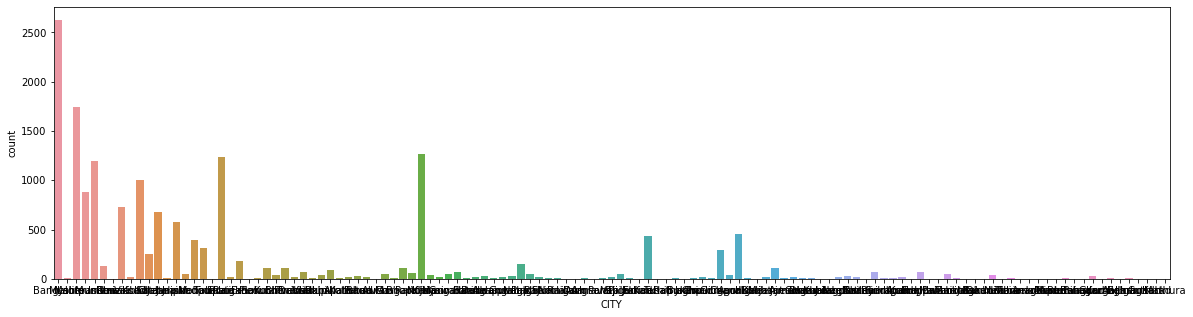

In [24]:
fig, ax=plt.subplots(figsize=(20,5))
sns.countplot(train_df1.CITY)

### Creating a column "METRO CITY" using CITY column to convert city information into boolean values

In [25]:
#list of metro cities
metro_cities=['Bangalore', 'Mumbai', 'Kolkata','Chennai', 'Jaipur', 'Vadodara', 'Pune', 'Gurgaon', 'Chandigarh','Bhopal']

In [26]:
# Creating New column
train_df1['METRO CITY'] = train_df1.CITY.apply(lambda x: 0 if x in metro_cities else 1)
test_df['METRO CITY'] = test_df.CITY.apply(lambda x: 0 if x in metro_cities else 1)
train_df1.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),PRICE_PER_SQR_FT,CITY,METRO CITY
0,Dealer,1,0,3,BHK,2600.104004,0,1,"1st Block Jayanagar,Bangalore",450.0,17307.000001,Bangalore,0
1,Owner,0,1,3,BHK,2470.588235,1,1,"1st Block Jayanagar,Bangalore",420.0,17000.000002,Bangalore,0


In [27]:
test_df.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,CITY,METRO CITY
0,Owner,0,0,1,BHK,545.17134,1,1,"Kamrej,Surat",Surat,1
1,Dealer,1,1,2,BHK,800.00000,0,0,"Panvel,Lalitpur",Lalitpur,1


In [28]:
#droping extra columns
final_train_df = train_df1.drop(['ADDRESS','CITY','PRICE_PER_SQR_FT'],axis=1)
final_test_df = test_df.drop(['ADDRESS','CITY'],axis=1)

In [29]:
train_df['POSTED_BY'].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

## Use one-hot encoding to convert categorical data into numerical form

In [30]:
final_train_df = pd.get_dummies(final_train_df,drop_first=True)
final_test_df = pd.get_dummies(final_test_df,drop_first=True)
final_train_df.head(4)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),METRO CITY,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,1,0,3,2600.104004,0,1,450.0,0,1,0,0
1,0,1,3,2470.588235,1,1,420.0,0,0,1,0
2,0,0,2,1149.095088,1,1,120.0,0,1,0,0
3,1,0,3,3200.000000,0,1,460.0,0,1,0,0


In [31]:
final_test_df.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,METRO CITY,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,1,545.17134,1,1,1,0,1,0
1,1,1,2,800.00000,0,0,1,1,0,0


In [32]:
## creating X variable by removing the target column from the dataset
X = final_train_df.drop(['TARGET(PRICE_IN_LACS)'],axis=1)
X.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,METRO CITY,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,1,0,3,2600.104004,0,1,0,1,0,0
1,0,1,3,2470.588235,1,1,0,0,1,0


In [33]:
y=final_train_df['TARGET(PRICE_IN_LACS)']
y.head()

0    450.0
1    420.0
2    120.0
3    460.0
4    420.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

## Using train_test_split to split the data into training and testing subset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Trying Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression
LReg_model = LinearRegression()
LReg_model.fit(X_train,y_train)
LReg_model.score(X_test,y_test)

0.8459128773457734

## then try RandomForest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_train,y_train)
RF_model.score(X_test,y_test)

0.9216058348245245

## Try ExtraTrees Regressor

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model = ExtraTreesRegressor()
ET_model.fit(X_train,y_train)
ET_model.score(X_test,y_test)

0.93886328216288

## Use K Fold cross validation to measure accuracy of ourmodel

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(ET_model, X, y, cv=cv)

array([0.91427131, 0.9421499 , 0.90338423, 0.92427839, 0.91096621])

### Checking most important features of the model

In [41]:
print(ET_model.feature_importances_)

[2.38820558e-03 6.90988155e-03 2.15960793e-02 9.33021185e-01
 2.91730576e-03 2.03049542e-02 8.85976943e-03 2.78308159e-03
 1.21860304e-03 9.34718684e-07]


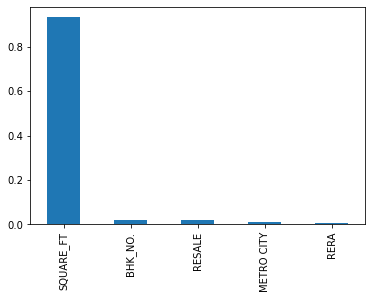

In [48]:
#plot graph of feature importances for better visualization

feat_importances = pd.Series(ET_model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

In [43]:
output = ET_model.predict(final_test_df)

output_df = pd.DataFrame({'ID': final_test_df.index, 'Predicted Price(in lakh)': output})
output_df.to_csv('E:\\brijesh\\Projects\\house_price\\Final_submission.csv',index=False)